In [20]:
import pandas as pd

df = pd.read_csv(r"outputs/casos_con_municerca.csv")
df=df[['municerca','casos','fecha_agg']]
df2=df.copy()



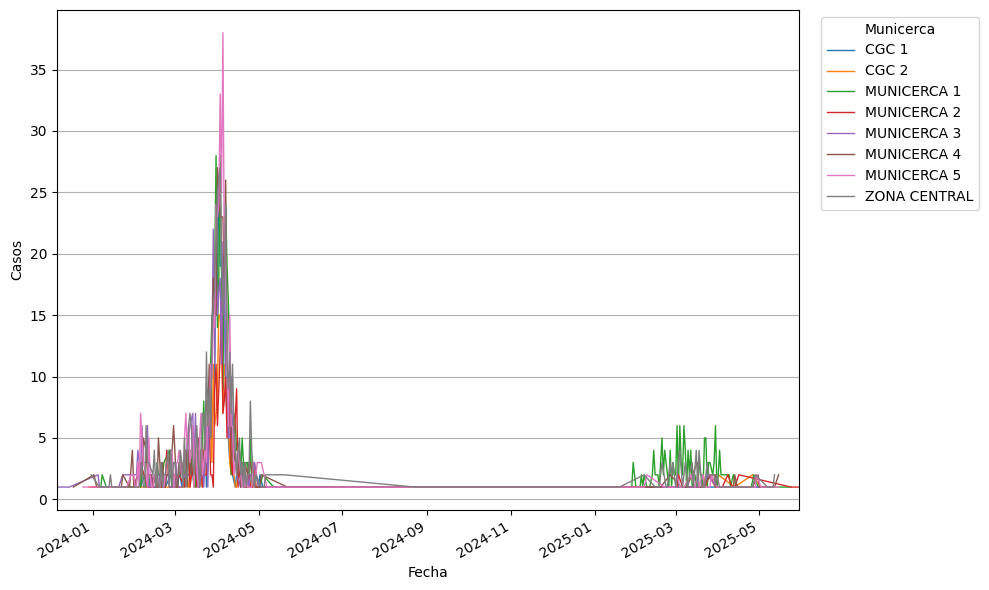

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv(r"outputs/casos_con_municerca.csv")
df['fecha_agg'] = pd.to_datetime(df['fecha_agg'])

fig, ax = plt.subplots(figsize=(10, 6))

for muni, g in df.sort_values('fecha_agg').groupby('municerca'):
    ax.plot(g['fecha_agg'], g['casos'], label=muni, linewidth=1)

ax.set_xlabel('Fecha')
ax.set_ylabel('Casos')
ax.legend(title='Municerca', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.margins(x=0)
ax.grid(True, axis='y')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()



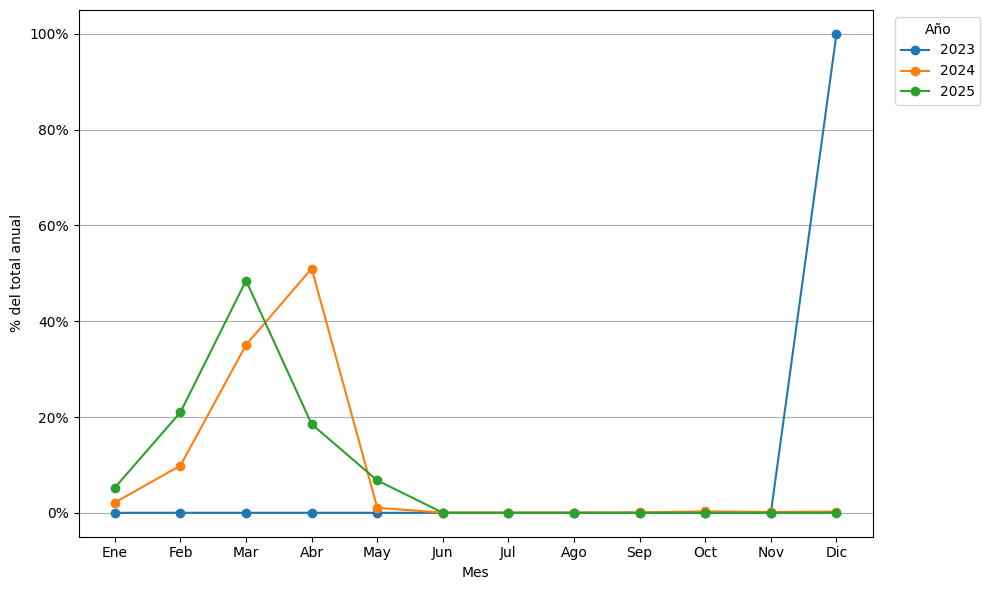

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Cargar y preparar
df = pd.read_csv(r"outputs/casos_con_municerca.csv")
df['fecha_agg'] = pd.to_datetime(df['fecha_agg'])
df['año'] = df['fecha_agg'].dt.year
df['mes'] = df['fecha_agg'].dt.month

# Suma por año/mes
mensual = df.groupby(['año','mes'], as_index=False)['casos'].sum()

# % del total anual (evita divisiones por 0)
tot_anual = mensual.groupby('año')['casos'].transform('sum')
mensual = mensual[tot_anual > 0].copy()
mensual['pct'] = mensual['casos'] / mensual.groupby('año')['casos'].transform('sum')

# Pivot a meses (1..12) x años, valores en [0,1]
tabla_pct = (mensual
             .pivot(index='mes', columns='año', values='pct')
             .reindex(range(1,13))
             .fillna(0))

# Plot
ax = tabla_pct.plot(marker='o', figsize=(10,6))
ax.set_xlabel('Mes')
ax.set_ylabel('% del total anual')
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(title='Año', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [27]:
pd.pivot_table(df2,index=["año"],aggfunc="sum").sort_values(by="casos")[-30:]

,casos,fecha_agg,mes,municerca
año,,,,
2023,9,2023-12-292023-12-312023-12-062023-12-152023-1...,1212121212121212,CGC 2MUNICERCA 2MUNICERCA 3MUNICERCA 3MUNICERC...
2025,400,2025-01-022025-01-252025-03-102025-03-212025-0...,0101030303030404040405050501010203030303030303...,CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1C...
2024,3082,2024-01-222024-01-252024-02-052024-02-082024-0...,0101020202020202020203030303030303030303030303...,CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1CGC 1C...


In [41]:


df_tesis=pd.read_csv(r"C:\Users\Nainh\Proton Drive\nainho1306\My files\UB\Tesis\Master_Tesis2\Bases\Base_clean_corrected_F.csv")





df_nacional=pd.read_csv(r"C:\Users\Nainh\Proton Drive\nainho1306\My files\Licitacion\Plataforma prevencion Dengue\Modelo\Datos\Casos\arboles virales\SNVS2 Nominal - Dengue (1).csv",delimiter=";")



C:\Users\Nainh\AppData\Local\Temp\ipykernel_9432\3767230469.py:1: DtypeWarning: Columns (9,11,12,13,15,16,17,18,19,20,21,22,23,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tesis=pd.read_csv(r"C:\Users\Nainh\Proton Drive\nainho1306\My files\UB\Tesis\Master_Tesis2\Bases\Base_clean_corrected_F.csv")


In [73]:
df_tesis2=df_tesis[["provincia","departamento"]].drop_duplicates()
df_nacional2=df_nacional[["PROVINCIA","DEPARTAMENTO"]].drop_duplicates()
df_nacional2["AUX2"]="1"
df_tesis2.columns=["PROVINCIA","DEPARTAMENTO"]
df_tesis2["AUX"]="1"

def up_no_accents(s: pd.Series) -> pd.Series:
    return (s.astype('string')                 # evita convertir NaN a "nan"
             .str.normalize('NFKD')            # separa letras y acentos
             .str.encode('ascii', 'ignore')    # elimina acentos (bytes)
             .str.decode('utf-8')              # vuelve a str
             .str.upper())

for c in ["PROVINCIA","DEPARTAMENTO"]:
    df_tesis2[c]    = up_no_accents(df_tesis2[c])
    df_nacional2[c] = up_no_accents(df_nacional2[c])


axx=pd.merge(df_nacional2,df_tesis2,on=["PROVINCIA","DEPARTAMENTO"],how="left")
axx.head()

,PROVINCIA,DEPARTAMENTO,AUX2,AUX
0,CABA,COMUNA 1,1,1
1,SANTA FE,LA CAPITAL,1,1
2,SANTA FE,LA CAPITAL,1,1
3,SANTA FE,CASEROS,1,1
4,SANTA FE,CASEROS,1,1


In [74]:
axx["AUX"].astype(float).sum(),axx["AUX2"].astype(float).sum()

(np.float64(936.0), np.float64(976.0))

In [75]:
axx.loc[(axx["AUX2"].isnull())|(axx["AUX"].isnull())]

,PROVINCIA,DEPARTAMENTO,AUX2,AUX
101,TUCUMAN,<NA>,1,NaN
136,SALTA,GRL. JOSE DE SAN MARTIN,1,NaN
214,FORMOSA,<NA>,1,NaN
231,MISIONES,LIBERTADOR GRL. SAN MARTIN,1,NaN
240,CABA,<NA>,1,NaN
445,BUENOS AIRES,<NA>,1,NaN
446,TUCUMAN,JUAN BAUTISTA ALBERDI,1,NaN
447,CORRIENTES,<NA>,1,NaN
462,CHACO,1O DE MAYO,1,NaN
606,CORDOBA,<NA>,1,NaN


In [85]:
# pip install rapidfuzz
import pandas as pd, re, unicodedata
from rapidfuzz import process, fuzz

# ---------- helpers ----------
def norm_txt(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s).upper()
    s = unicodedata.normalize('NFKD', s).encode('ASCII','ignore').decode('utf-8')
    # expandir abreviaturas comunes
    repl = {
        r'\bGRAL?\.?\b|\bGRL\.?\b': ' GENERAL ',
        r'\bDR\.?\b': ' DOCTOR ',
        r'\bSTA\.?\b': ' SANTA ',
        r'\bSTO\.?\b': ' SANTO ',
        r'\bSAN?\.\b': ' SAN ',
        r'[^A-Z0-9 ]+': ' ',      # quita signos
    }
    for pat, rep in repl.items():
        s = re.sub(pat, rep, s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

def add_norm(df, prov_col='PROVINCIA', dpto_col='DEPARTAMENTO'):
    out = df.copy()
    out['prov_n'] = out[prov_col].map(norm_txt)
    out['dpto_n'] = out[dpto_col].map(norm_txt)
    return out

# ---------- preparar dataframes ----------
# 0) Preparar con un id estable
t = add_norm(df_tesis2,  'PROVINCIA','DEPARTAMENTO').reset_index(names='_rowid_t')
n = add_norm(df_nacional2,'PROVINCIA','DEPARTAMENTO').reset_index(names='_rowid')  # <- id

# 1) Exact match
key = ['prov_n','dpto_n']
exact = n.merge(t[key + ['PROVINCIA','DEPARTAMENTO']].drop_duplicates(),
                on=key, how='left', suffixes=('','_canon'))
matched_exact = exact[~exact['PROVINCIA_canon'].isna()]
unmatched = exact[exact['PROVINCIA_canon'].isna()].copy()

# 2) Fuzzy dentro de provincia
from rapidfuzz import process, fuzz
cat_por_prov = t.groupby('prov_n')['dpto_n'].apply(list).to_dict()

def best_match(row):
    ch = cat_por_prov.get(row['prov_n'], [])
    if not ch: return pd.Series({'dpto_n_match':'', 'score':0})
    m, sc, _ = process.extractOne(row['dpto_n'], ch, scorer=fuzz.token_sort_ratio)
    return pd.Series({'dpto_n_match': m, 'score': sc})

if not unmatched.empty:
    unmatched[['dpto_n_match','score']] = unmatched.apply(best_match, axis=1)

    mapa_canon = t[['prov_n','dpto_n','PROVINCIA','DEPARTAMENTO']].drop_duplicates()

    sug = unmatched.merge(
        mapa_canon,
        how='left',
        left_on=['prov_n','dpto_n_match'],
        right_on=['prov_n','dpto_n'],
        suffixes=('', '_canon')
    )

    TH = 90

    # Si por alguna razón 'score' no está, créala a 0
    if 'score' not in sug.columns:
        sug['score'] = 0

    # Filas que superan el umbral
    sug_ok = sug.loc[sug['score'] >= TH].copy()

    # Elegir UNA sugerencia por _rowid_:
    if not sug_ok.empty:
        # si hay score, quedate con la de mayor score por _rowid_
        if 'score' in sug_ok.columns:
            idx = sug_ok.groupby('_rowid')['score'].idxmax()
            fix_unique = sug_ok.loc[idx, ['_rowid','PROVINCIA_canon','DEPARTAMENTO_canon']].copy()
        else:
            # fallback: primera por _rowid_
            fix_unique = sug_ok.drop_duplicates('_rowid')[['_rowid','PROVINCIA_canon','DEPARTAMENTO_canon']].copy()
    else:
        fix_unique = pd.DataFrame(columns=['_rowid','PROVINCIA_canon','DEPARTAMENTO_canon'])

    # --- aplicar correcciones sin duplicar columnas ---
    n_corr = n.copy()
    if not fix_unique.empty:
        prov_map = dict(zip(fix_unique['_rowid'], fix_unique['PROVINCIA_canon']))
        dpto_map = dict(zip(fix_unique['_rowid'], fix_unique['DEPARTAMENTO_canon']))

        n_corr['PROVINCIA']    = n_corr['_rowid'].map(prov_map).fillna(n_corr['PROVINCIA'])
        n_corr['DEPARTAMENTO'] = n_corr['_rowid'].map(dpto_map).fillna(n_corr['DEPARTAMENTO'])

    # --- pendientes para revisión manual (incluye score si existe) ---
    pendientes = sug.loc[sug['_rowid'].isin(
        set(n['_rowid']) - set(fix_unique['_rowid'])
    ), ['_rowid','PROVINCIA','DEPARTAMENTO','prov_n','dpto_n','dpto_n_match','score',
        'PROVINCIA_canon','DEPARTAMENTO_canon']].copy()
else:
    n_corr = n.copy()

# 4) Merge final contra df_tesis2
out = n_corr.merge(df_tesis2, on=['PROVINCIA','DEPARTAMENTO'], how='left', suffixes=('_src',''))

# 'pendientes' trae los casos a chequear (ej.: "GRL. JOSE DE SAN MARTIN"→"GENERAL SAN MARTIN" en Salta).
out.loc[out["AUX"].isnull()]

,_rowid,PROVINCIA,DEPARTAMENTO,AUX2,prov_n,dpto_n,AUX
101,86,TUCUMAN,<NA>,1,TUCUMAN,,NaN
136,159,SALTA,GRL. JOSE DE SAN MARTIN,1,SALTA,GENERAL JOSE DE SAN MARTIN,NaN
214,360,FORMOSA,<NA>,1,FORMOSA,,NaN
231,448,MISIONES,LIBERTADOR GRL. SAN MARTIN,1,MISIONES,LIBERTADOR GENERAL SAN MARTIN,NaN
240,477,CABA,<NA>,1,CABA,,NaN
445,2195,BUENOS AIRES,<NA>,1,BUENOS AIRES,,NaN
446,2204,TUCUMAN,JUAN BAUTISTA ALBERDI,1,TUCUMAN,JUAN BAUTISTA ALBERDI,NaN
447,2220,CORRIENTES,<NA>,1,CORRIENTES,,NaN
462,2547,PROVINCIA_canon,DEPARTAMENTO_canon,1,CHACO,1O DE MAYO,NaN
606,6653,CORDOBA,<NA>,1,CORDOBA,,NaN
